[1.5011995203836164, 1.5016324450410627, 1.6860901518009053, 2.0008997975910736, 2.0012246250733576, 2.143105223734943, 2.500719896349849, 2.5009798079952583, 2.6158937287282904, 3.50051424793558, 3.5006999300139965, 3.5836992061276574, 4.000449974690347, 4.000612453112648, 4.031575374465917, 4.031736598539146, 4.073438351073943, 4.104010233905369, 4.272423200011909, 4.272575335789879, 4.340840932354007, 5.315411555091478, 5.315533839606329, 5.370558630161298, 5.385499048370541, 5.385619741496795, 5.439935661384241, 6.000299992500375, 6.000408319439603, 6.049206559541507, 6.184949474328792, 6.185054567261311, 6.232407239582472, 6.403405344033751, 6.403506851718049, 6.449255771017304, 6.946481123561771, 6.946574695488417, 6.988769562662658, 7.81048013889031, 7.810563359963224, 7.848114423222944, 8.000224996836026, 8.00030624413841, 8.036970822393224, 8.139631441287744, 8.139711297091562, 8.175750730055315, 8.732330731253828, 8.73240516696288, 8.766008213548513, 9.43417192974561, 9.43424

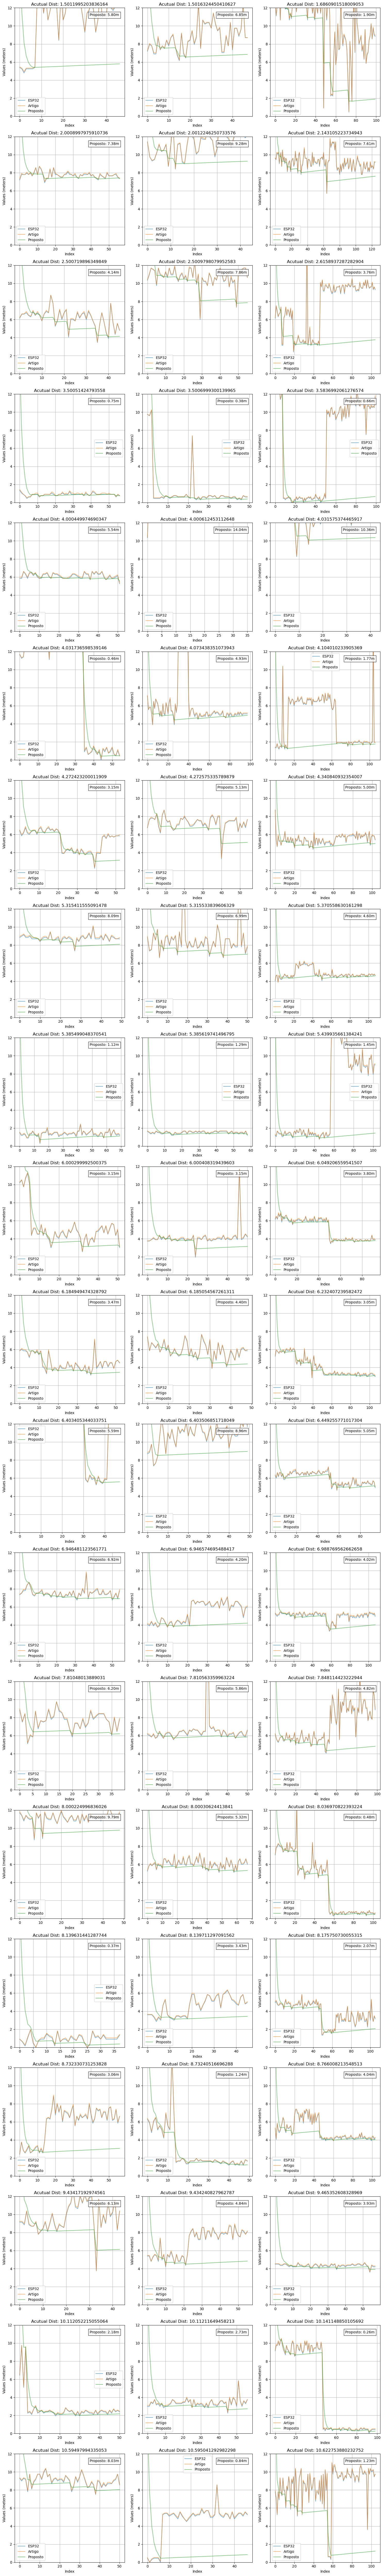

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import math

rawnano2m = 0.299792458 / 2

csv_file = 'sa.csv'
data = pd.read_csv(csv_file)
uniq = data['actualDist'].unique().tolist()
uniq = sorted(uniq)

print(uniq)
print (data.head())

n_cols = 3  # Number of columns in grid
n_rows = math.ceil(len(uniq) / n_cols)

fig = plt.figure(figsize=(15, 5*n_rows))
plt.subplots_adjust(hspace=0.4)

# Process each CSV file
for id in uniq:
    
    data_id = data[data['actualDist'] == id].copy()
    data_id = data[data['actualDist'] == id].copy().reset_index(drop=True)
    valor = 30.0

    for index, row in data_id.iterrows():
        dist = row['rttEst'] * rawnano2m
        if dist > valor:
            valor = valor + 0.01
        else:
            valor = valor - (valor - dist) * 0.5
        data_id.at[index, 'dist_calc'] = valor

    # Create subplot
    ax = fig.add_subplot(n_rows, n_cols, uniq.index(id) + 1)
    
    # Plot data
    #ax.plot(data_id.index, data_id['rttRaw'] * rawnano2m, label='Dist Raw', alpha=0.6)
    #ax.plot(data_id.index, data_id['absErrRaw'], label='absErrRaw', alpha=0.6)
    #ax.plot(data_id.index, data_id['distEstOwn'], label='Dist Artigo', alpha=0.6)
    #ax.plot(data_id.index, data_id['dist_calc'], label='Dist Calc', alpha=0.6)

    # ax.plot(data_id.index, data_id['estDistRaw'], label='estDistRaw', alpha=0.6)
    # ax.plot(data_id.index, data_id['absErrRaw'], label='absErrRaw', alpha=0.6)
    # ax.plot(data_id.index, data_id['distEst'], label='distEst', alpha=0.6)
    # ax.plot(data_id.index, data_id['dist_calc'], label='Dist Calc', alpha=0.6)

    ax.plot(data_id.index, data_id['estDistEst'], label='ESP32', alpha=0.6)
    ax.plot(data_id.index, data_id['distEst'], label='Artigo', alpha=0.6)
    ax.plot(data_id.index, data_id['dist_calc'], label='Proposto', alpha=0.6)

    # Get last distance value
    last_dist = data_id['dist_calc'].iloc[-1]
    
    # Add text annotation
    ax.text(0.95, 0.95, f'Proposto: {last_dist:.2f}m', 
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8))

    # Set y-axis limit to 30m
    ax.set_ylim(0, 12)

    # Add labels and title
    ax.set_title(f'Acutual Dist: {id}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values (meters)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()